## Implementation of Logistic Regression

Tổng quát : Logistic Regression là một thuật toán học có giám sát, thường được sử dụng trong bài toán phân loại (Classification). So với thuật toán KNN, Logistic Regression tiếp cận bài toán phân loại theo một hướng khác. Thay vì phân loại dựa trên độ gần của các điểm dữ liệu, nó chủ đích sử dụng các dữ liệu sẵn có để ước lượng ra một hàm toán học dựa trên các feature của dữ liệu từ đó cho phép nó thay đổi trọng số, cải thiện hàm mất mát và đưa ra quyết định tốt hơn.

--> Logistic Regression chia sẻ ý tưởng với Linear Regression

Bài toán: Giả sử ta có tập hợp các điểm dữ liệu được mô tả bằng một ma trận **X** có kích thước **MxN** với **M** là số lượng điểm dữ liệu và N là số lượng feature và một vector **y** cho biết class tương ứng của mỗi điểm dữ liệu. Nhiệm vụ là hãy dự đoán class của một điểm dữ liệu khác chia sẻ những feature như điểm dữ liệu trong X đặc trưng bằng feature vecto **k**

Những câu hỏi cần trả lời trong bài toán này:
- Hàm số nào ta sử dụng để tổng hợp đặc trưng của dữ liệu vào một con số cụ thể
- Hàm số nào ta có thể sử dụng để đưa ra kết quả phân loại
- Đặc điểm của hàm số đó là như thế nào
- Dạng hàm mất mát nào là phù hợp với bài toán phân loại này
- Cách thức ta update các trọng số trong mô hình là gì

In [1]:
#Import necessary libraries
import numpy as np

### Hàm số sử dụng để tổng hợp đặc trưng

Trong bài toán này, ta sử dụng hàm số tuyến tính để tổng hợp đặc trưng từ dữ liệu vào một con số tổng hợp nhất định
$$
    f(x) = w_1*x_1 + ... + w_n*x_n + b
$$

In [13]:
def linearFunction(w : np.ndarray, X : np.ndarray):
    return np.dot(X, w)

### Hàm số sử dụng cho việc phân loại

Dạng hàm số nào là phù hợp cho bài toán phân loại? Xem xét xem hàm số đó cần đáp ứng những điều kiện gì nào! 

Lý tưởng nhất, hàm số đó sẽ lấy vào giá trị liên tục (kết quả của hàm số tổng hợp ở trên) và cho ra một giá trị phân biệt class của điểm dữ liệu, tiện nhất chắc chắn là tỷ lệ % điểm dữ liệu đó thuộc về một class. Rồi sau đó sẽ lựa chọn dựa trên tỷ lệ % đó 

Trong thực tiễn, ta sử dụng một dạng hàm là sigmoid function:

$$
    f(x) = \frac {1}{1 + e^{-x}}
$$

hoặc dạng hàm tanh function:

$$
    f(x) = \tanh ({x}) = \frac {e^x - e^{-x}} {e^x + e^{-x}}
$$

In [ ]:
def sigmoidFunction(x : np.ndarray) -> np.ndarray :
    return 1/(1 + np.exp(-x))

In [ ]:
def tanhFunction(x : np.ndarray) -> np.ndarray :
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  #More simple: np.tanh()

Qua đó, ta có hệ hàm số dùng để dự báo class của dữ liệu như sau:
$$
    \begin {cases}
    z = w_1*x_1 + ... + w_n*x_n + b \\
    f(z) = sigmoid(z)
    \end {cases}
$$

In [18]:
def predict(w : np.ndarray, X : np.ndarray) -> np.ndarray:
    z = linearFunction(w, X)    # Use linear function to synthesize features into z
    return sigmoidFunction(z)

### Xây dựng hàm mất mát cho bài toán Logistic Regression

Dựa trên bài toán, cho trước các class 0 và 1, thì ta có thể giả sử rằng xác suất để một điểm dữ liệu thuộc vào class 1 là $f(\boldsymbol{w}^T \boldsymbol{x})$ tương ứng với xác suất để điểm dữ liệu thuộc vào class 0 là $ 1 - f(\boldsymbol{w}^T \boldsymbol{x})$. Với một điểm dữ liệu training (đã biết y đầu ra) ta có thể viết như sau:
$$
\begin{cases}
    P(y_i = 1\mid \boldsymbol{x_i}; \boldsymbol{w}) = f(\boldsymbol{w}^T \boldsymbol{x}) \\
    P(y_i = 0\mid \boldsymbol{x_i}; \boldsymbol{w}) = 1 - f(\boldsymbol{w}^T \boldsymbol{x})
\end{cases}
$$
Trong đó, $P(y_i = 1\mid \boldsymbol{x_i}; \boldsymbol{w})$ được hiểu là xác suất xảy ra sự kiện đầu ra $y_i$ = 1 biết tham số mô hình và dữ liệu đầu vào tương ứng. Khi này, mục tiêu của ta sẽ là tìm giá trị $\boldsymbol{w}$ sao cho $f(\boldsymbol{w}^T \boldsymbol{x})$ càng gần với 1 càng tốt với các điểm dữ liệu thuộc class 1 và càng gần với 0 càng tốt với những điểm thuộc class 0.

Ký hiệu $z_i = f(\boldsymbol{w}^T \boldsymbol{x})$ ta có thể viết lại như sau:
$$
    P(y_i\mid \boldsymbol{x_i}; \boldsymbol{w}) = z_i^{y_i}*(1 - z_i)^{1- y_i}
$$
Biểu thức này tương đương bởi vì nếu $y_i = 1$ thì xác suất xảy ra với điều kiện biết trước tham số và dữ liệu đầu vào sẽ là $z_i$ và ngược lại khi $y_i = 0$

Khi này, với một tập dữ liệu huấn luyện $\boldsymbol{X} = [\boldsymbol{x}_1 , \boldsymbol{x}_2, \cdots, \boldsymbol{x}_M]^T \in \mathbb{R}^{M \times N}$ với mỗi $\boldsymbol{x}_i$ là một điểm dữ liệu có $N$ features và $\boldsymbol{y} = [y_1, y_2, \cdots, y_M] $, chúng ta cần tìm $ \boldsymbol{w} $ sao cho biểu thức sau đây đạt giá trị lớn nhất
$$
    P(\boldsymbol{y} \mid \boldsymbol{X}; \boldsymbol{w})
$$
với $\boldsymbol{X}$ và $\boldsymbol{y} $ có hành vi như biến ngẫu nhiên. Nói tóm lại, 
$$
    \boldsymbol{w} = \arg\max_{w} {P(\boldsymbol{y} \mid \boldsymbol{X}; \boldsymbol{w})}
$$


Bài toán tìm tham số để mô hình gần dữ liệu có dạng như trên được gọi là **maximum likelihood restimation**. Thêm giả định rằng các điểm dữ liệu được sinh ra một cách ngẫu nhiên độc lập với nhau thì ta có thể viết lại:

$$
    P(\boldsymbol{y} \mid \boldsymbol{X}; \boldsymbol{w}) = \prod_{i=1}^M (P(y_i\mid \boldsymbol{x}_i; \boldsymbol{w}))= \prod_{i=1}^M z_i^{y_i}*(1 - z_i)^{1- y_i}
$$

Quá trình tối ưu hóa hàm số này không hề dễ dàng và có thể có nhiều sai số có thể xảy ra. Một cách khác ta có thể biến đổi hàm số này sao cho đúng với khái niệm về hàm mất mát nhất chính là lấy giá trị âm của logarit tự nhiên của xác suất trên. Từ đó ta được một hàm mới:

$$
    LossFuntion(\boldsymbol{w}) = -\log {(P(\boldsymbol{y} \mid \boldsymbol{X}; \boldsymbol{w})}) \\
    = - \sum_{i = 1}^M (y_i \log{z_i} + (1 - y_i) \log {(1 - z_i)})
$$

Biểu thức vế phải có tên gọi là **cross entropy**, thường được sử dụng để đo khoảng cách giữa hai phân phối (distributions). Trong bài toán đang xét, một phân phối là dữ liệu được cho, với xác suất chỉ là 0 hoặc 1; phân phối còn lại được tính theo mô hình logistic regression. Khoảng cách giữa hai phân phối nhỏ đồng nghĩa với việc (có vẻ hiển nhiên là) hai phân phối đó rất gần nhau

In [10]:
def crossEntropyLoss(yTrue : np.ndarray, yPred : np.ndarray) -> np.ndarray:
    return -(yTrue*np.log(yPred) + (1 - yTrue)*np.log(1 - yPred))

In [32]:
def weightGradient(yTrue : np.ndarray, yPred : np.array, X : np.ndarray) -> np.ndarray:
    return -(yTrue - yPred)*X.T

In [12]:
def updateWeight(w: np.ndarray, weightGradients : np.ndarray, learningRate:np.float16) -> np.ndarray:
    return w - learningRate*weightGradients

### Examine in the real context

In [23]:
# Initialize the data X and y
X = np.array([
    [1.0, 0.5],
    [2.0, 1.0],
    [3.0, 1.5],
    [2.0, 2.0],
    [1.0, 2.5],
    [2.0, 3.0],
    [1.0, 3.5],
    [2.0, 4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [24]:
numberOfSamples = X.shape[0]

# Append another one row at the end of data X
X = np.hstack([np.ones((numberOfSamples, 1)), X])

In [34]:
numberOfFeatures = X.shape[1]
weights = np.array([0.97843958, 0.42237186, 0.20944146])
numberOfEpochs = 10
learningRate = 0.001

losses = []
for epoch in range(numberOfEpochs):

    epochLoss = []
    for recordIdx in range(numberOfSamples):
        x = X[recordIdx]
        yTrue = Y[recordIdx]
        yPred = predict(weights, x)

        loss = crossEntropyLoss(yTrue, yPred)
        epochLoss.append(loss)

        weightChanges = weightGradient(yTrue, yPred, x)
        weights = updateWeight(weights, weightChanges, learningRate)
    
    loss = sum(epochLoss)/len(epochLoss)
    print(f"Iteration {epoch} - Loss: {loss}")
    losses.append(loss)


Iteration 0 - Loss: 1.0733810664433971
Iteration 1 - Loss: 1.06719060524287
Iteration 2 - Loss: 1.0610778099671627
Iteration 3 - Loss: 1.0550430431942694
Iteration 4 - Loss: 1.0490866351029198
Iteration 5 - Loss: 1.0432088827491226
Iteration 6 - Loss: 1.0374100493939187
Iteration 7 - Loss: 1.0316903638851274
Iteration 8 - Loss: 1.0260500200957137
Iteration 9 - Loss: 1.0204891764212172


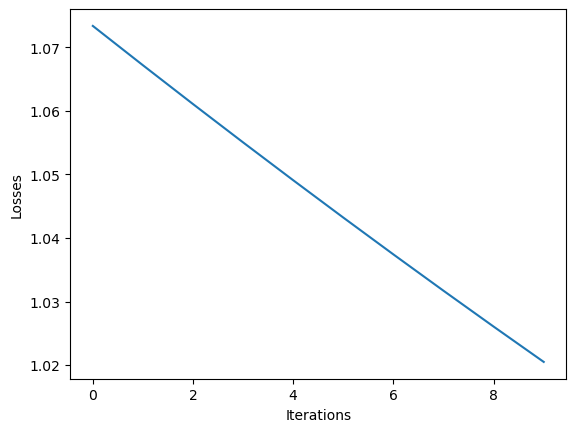

In [35]:
import matplotlib.pyplot as plt
plt.plot(list(range(numberOfEpochs)), losses)
plt.xlabel("Iterations")
plt.ylabel("Losses")

plt.show()